In [46]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [21]:
digits = datasets.load_digits() 

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
digits.data.shape

(1797, 64)

In [9]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

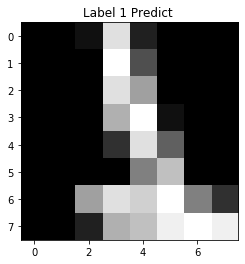

In [30]:
def plot_image(x, y, y_pred=""):
    plt.imshow(np.reshape(x, (8, 8)), cmap=plt.cm.gray)
    plt.title(f'Label {y} Predict {y_pred}')

plot_image(digits.data[1000], digits.target[1000])
plt.show()

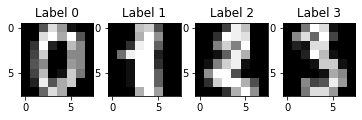

In [10]:
for i in range(0, 4):
    plt.subplot(1, 4, i+1)
    plot_image(digits.data[i], digits.target[i])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=1/3, random_state=42)

In [14]:
x_train.shape, x_test.shape

((1198, 64), (599, 64))

In [27]:
clf = LogisticRegression(max_iter=10000)
clf.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
y_pred = clf.predict(x_test)

In [28]:
acc = accuracy_score(y_test, y_pred)
print(f"accuracy {acc*100:.2f}%")

accuracy 96.16%


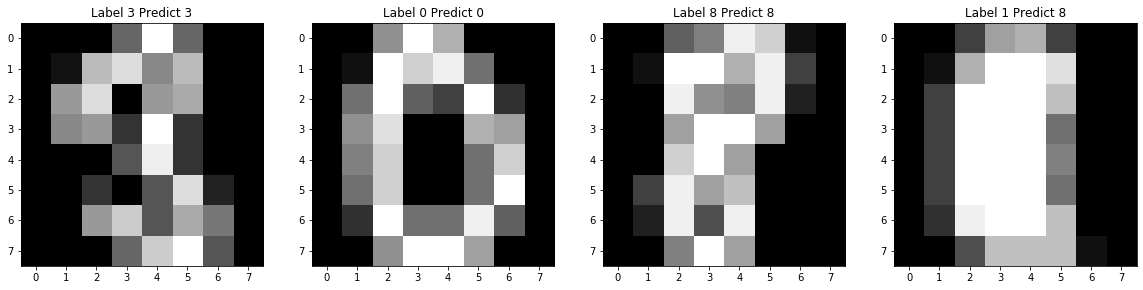

In [40]:
plt.figure(figsize=(20,5))
for i in range(0, 4):
    idx = np.random.randint(0, len(x_test))
    plt.subplot(1, 4, i+1)
    plot_image(x_test[idx], y_test[idx], y_pred[idx])
plt.show()

In [41]:
conf = confusion_matrix(y_test, y_pred)
conf

array([[54,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 52,  1,  0,  0,  0,  0,  0,  4,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 55,  0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 63,  0,  0,  0,  0,  0],
       [ 0,  2,  1,  0,  0, 68,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 61,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 51,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5, 64]], dtype=int64)

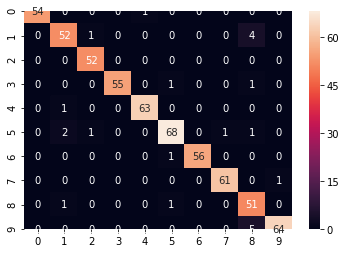

In [49]:
sns.heatmap(conf, annot=True)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        55
           1       0.93      0.91      0.92        57
           2       0.96      1.00      0.98        52
           3       1.00      0.96      0.98        57
           4       0.98      0.98      0.98        64
           5       0.96      0.93      0.94        73
           6       1.00      0.98      0.99        57
           7       0.98      0.98      0.98        62
           8       0.82      0.96      0.89        53
           9       0.98      0.93      0.96        69

    accuracy                           0.96       599
   macro avg       0.96      0.96      0.96       599
weighted avg       0.96      0.96      0.96       599



In [ ]:
# precision = TP/(TP+FP) => how many selected items are relevant?
# recall = TP/(TP+FN) => how many relevant items are selected?
# TP: true positives, FP: false positives, FN: false negatives